In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("SPY - SPY.csv")
df.head()

,date,open,high,low,close,volume
0,2000-01-03,107.404545,107.404545,104.234934,105.366938,8164300.0
1,2000-01-04,103.985859,104.370774,101.167180,101.246443,8089800.0
2,2000-01-05,101.382283,102.536894,99.435236,101.427563,12177900.0
3,2000-01-06,101.155883,102.514288,99.797478,99.797478,6227200.0
4,2000-01-07,101.653964,105.593338,101.472843,105.593338,8066500.0


In [3]:
portfolio = 0
df["equity"] = 0
curr = 0
for i in range(13, len(df)): 
    if df["close"].loc[i] > df["close"].loc[i-13]:
        portfolio = 1
    elif df["close"].loc[i] < df["close"].loc[i-13]:
        portfolio == 0
    if portfolio == 1:
        df["equity"].loc[i] = df["close"].loc[i]
        curr = df["close"].loc[i]
    else:
        df["equity"].loc[i] = curr        

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
equity = pd.DataFrame({"equity": df["equity"].values}, index=df["date"])

1. Постройте график кривой доходности такой торговой модели (equity curve) для имеющихся исторических даних. Какую конечную прибыль получил бы инвестор? 

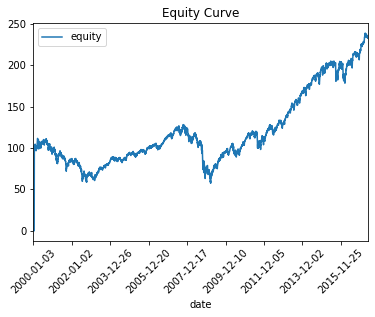

In [5]:
equity.plot()
plt.xticks(rotation=45)
plt.title("Equity Curve")
plt.show()

In [24]:
print("Конечная прибыль:", round(sum(equity["equity"][equity["equity"]>0].diff()[1:]), 6))

Конечная прибыль: 132.353428


2. Оцените среднюю дневную доходность и дисперсию дневной доходности для такой модели.

In [25]:
print("Средняя дневная доходность:", equity["equity"].mean())
print("Дисперсия дневной доходноти:", equity["equity"].var())

Средняя дневная доходность: 121.27264519113271
Дисперсия дневной доходноти: 1941.9420951321
